In [1]:
import pandas as pd

df = pd.read_csv('../data/full/ratings_edited.csv')
df

,userId,movieId,rating,timestamp,movie_idx
0,0,307,3.5,1256677221,307
1,0,481,3.5,1256677456,481
2,0,1091,1.5,1256677471,1091
3,0,1257,4.5,1256677460,1257
4,0,1449,4.5,1256677264,1449
...,...,...,...,...,...
27753439,283227,8542,4.5,1379882795,8351
27753440,283227,8712,4.5,1379882751,8513
27753441,283227,34405,4.5,1379882889,22224
27753442,283227,44761,4.5,1354159524,27965


In [2]:
avg_ratings = {}
for id in set(df.movie_idx.values):
  filtered = df[df.movie_idx == id]
  total = filtered.rating.sum()
  count = len(filtered)
  avg_ratings[id] = total/count


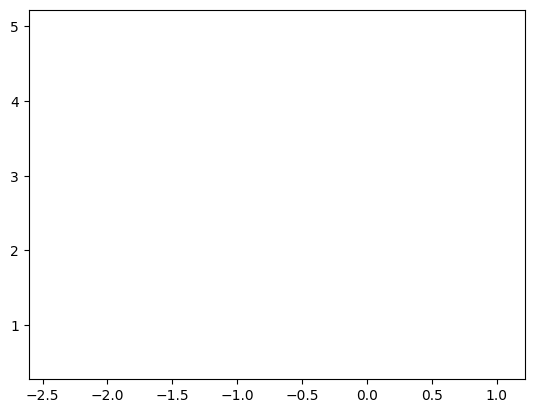

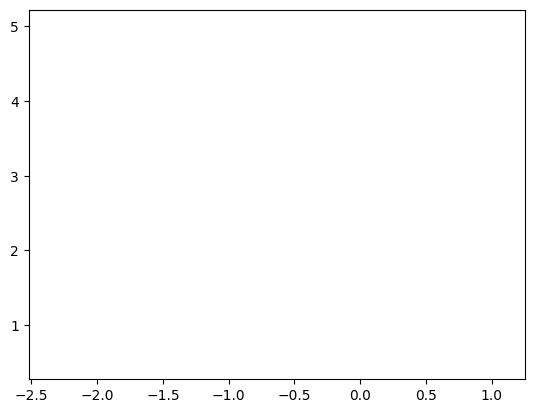

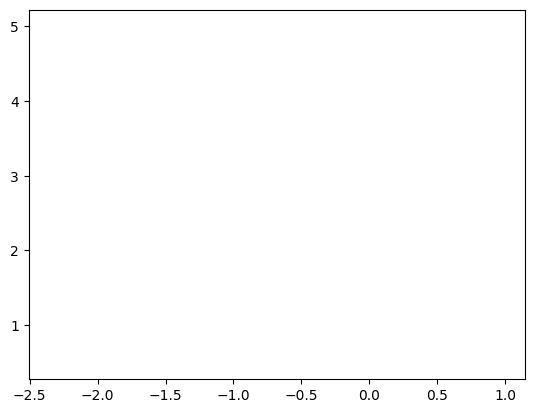

In [5]:
import matplotlib.pyplot as plt
from model import Model

models = [Model(f'models/{name}.hdf5')
          for name in ['model-5-20-0.591', 'model-10-20-0.537', 'model-20-20-0.478']]

for model in models:
  for id in avg_ratings:
    plt.plot(model.bias(id), avg_ratings[id])
  plt.show()

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

for model in models:
  ratings = []
  biases = []
  for id in avg_ratings:
    ratings.append(avg_ratings[id])
    biases.append(model.bias(id))
  print(cosine_similarity([ratings], [biases]))
  print(pearsonr(ratings, biases))
  print(ratings[:10], biases[:10])


[[-0.13039953]]
PearsonRResult(statistic=0.6476632678791463, pvalue=0.0)
[2.5, 3.8866494325899312, 3.246582912721512, 3.173981392364453, 2.874539979926397, 3.0772909396406876, 3.8442108566049575, 3.371348277890334, 3.122482131254061, 3.007529781973477] [-0.27172402, 0.32603174, -0.2590918, -0.45964333, -0.7338084, -0.70838785, 0.20195559, -0.30761445, -0.52554566, -0.69600517]
[[-0.11461339]]
PearsonRResult(statistic=0.6481719733693021, pvalue=0.0)
[2.5, 3.8866494325899312, 3.246582912721512, 3.173981392364453, 2.874539979926397, 3.0772909396406876, 3.8442108566049575, 3.371348277890334, 3.122482131254061, 3.007529781973477] [-0.26865023, 0.253213, -0.31259748, -0.48783714, -0.8621284, -0.6140905, 0.16907652, -0.37849143, -0.57963777, -0.7433769]
[[-0.112387]]
PearsonRResult(statistic=0.6425793463113993, pvalue=0.0)
[2.5, 3.8866494325899312, 3.246582912721512, 3.173981392364453, 2.874539979926397, 3.0772909396406876, 3.8442108566049575, 3.371348277890334, 3.122482131254061, 3.007529781